Predator Prey Dynamics: Systems of Coupled Difference Equations
---------------------------------------------------------------

Another famous set of population growth models are the [Lotka-Volterra](http://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equation)
equations, widely knowns as the predator-prey growth equations.  The equations are used to model a 
simplified environment with two species, a predator species, and a prey species on which the predators 
hunt and consume.  Here we will ignore other  limiting factors and only concentrate on how the 
population size of the two species affect one another.  You should  be able to imagine the basic 
dynamics.  If prey is plentful, then the predators can thrive by eating lots of prey.  But when predators 
thrive, their populations increase.  As their populations increase, they begin to have larger 
impacts on the prey population.  When the prey population is reduced sufficiently, predators don't have enough 
resources to survive, and begin to die of starvation or migrate to new areas.  And conversely, when predators 
are scarse, the prey species  can thrive and overpopulate.  But large numbers of prey make 
a rich environment in which the predators can begin  to increase. 

There can be many types of resulting dynamics, depending on what parameters are used in the model.  The prey 
and predator species can reach separate almost stable states, where their populations reach a particular pattern 
and stay close to that population size.  The typical behavior seen in the space is for the population sizes
to oscillate between lower and upper population sizes, where the predator population lags behind with some delay from
the prey population.

The predator-prey equations were originally formulated as a coupled pair of ordinary differential equations:

$ \frac{dx}{dt} = x(\alpha - \beta y) $

$ \frac{dy}{dt} = -y(\gamma - \delta x) $

Here $x$ is the prey species population size (for example rabbits), and $y$ is the predator species population
(for example foxes).  $\alpha$, $\beta$, $\gamma$, and $\delta$ are the parameters of the equations 
that determine the resulting dynamics.  Since these are differential equations they are basically giving 
formula for the instanteous rate of change of the two populations at any given point in time.  

In a future lecture, we will go into more detail into how ordinary differential equations are approximated by
sets of difference equations, or recurrence relations.  Lets look at the process briefly here.  We described
the $\frac{dx}{dt}$ and $\frac{dy}{dt}$ as the rate of change of the populations at a given instant in time.
If we break a time interval T into many small pieces, and approximate the rate of change of the population
size over many small intervals, we will approximate in discrete steps the behavior of the continuous
differential equations.  This is similiar to, for example, how we approximated the integral of a
function by breaking up the interval into a number of smaller rectangles/trapezoids.  If we increase
the number of intervals we break the function up into, we will increase the accuracy of our prediction.

We will basically do the same thing here.  The rates of change of the difference equations can be
be multiplied by the current population size, and added to the current population size to get the
next approximate population size for the next subinterval.  As long as we break up time $T$ into
sufficiently small intervals, we will end up with a sufficiently good discrete approximation of
the differential equation.  This is basically known as [Euler's method](http://en.wikipedia.org/wiki/Euler_method) 
for approximating an ordinary differential equation.

So if we use the above equations, we can transform them into an approximate
recurrence relation like this:

$ x_{t} = x_{t-1} + \frac{1}{I} [x_{t-1} (\alpha - \beta y_{t-1}) ] $

$ y_{t} = y_{t-1} + \frac{1}{I} [-y_{t-1} (\gamma - \delta x_{t-1}) ] $

Basically if you look carefully, we have used the rate of change from the ordinary differential equations to
approximate the growth rate over many small subintervals, to produce a set of coupled difference equations.
Here $I$ is the number of sub intervals we divide each discrete time step $t$ into.  So for example, if we
want to simulate 10 generations of population growth, and if we are discretizing each generation into 
$I=100$ subintervals, we will need $t$ to range from $0$ to $10 \times 100 = 1000$, and the fraction of
the subinterval will be $\frac{1}{100}$.  If you don't follow all of that, look at the example
implementations below to get a better feel for what is happenning.

Here the two recurrence relations are coupled.  This is different from our previous example of the
logistic growth function.  Here our coupled difference equations are both recurrence relations.
And each recurrence relation has a term using the population size of the other population in
it.  This is how the population size of the predators effects the prey population size and 
vice versa.

For example, for the prey species $x$ population size, $\alpha x_{t-1}$ represents the growth rate of the prey
species.  The second term $- \beta x_{t-1} y_{t-1}$ represents the effect of the predators eating the prey
species.  The more prey and/or the more predators in the populations, the higher this product will be, and
thus the larger the number of deaths will be from predation.  There are similar parameters for the 
predator species $y$, though reversed a bit.  Here the term $+ \delta x_{t-1} y_{t-1}$ works in reverse
for the predators, by increasing the predator population when there are lots of prey around for 
them to consume.  In the absense of any prey to consume, the $- \gamma y_{t-1}$ term means that
the predator population tends to decrease at the $\gamma$ rate.

Look here at the [Wolfram Predator-Prey demonstration](http://demonstrations.wolfram.com/PredatorPreyModel/) for some
more examples of how the Predator-Prey dynamics work.

Hopefully some examples will make the preceeding discussion more clear.  Lets first look at an example 
of parameters for these equations that lead to a stable steady state of the predator-prey populations:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

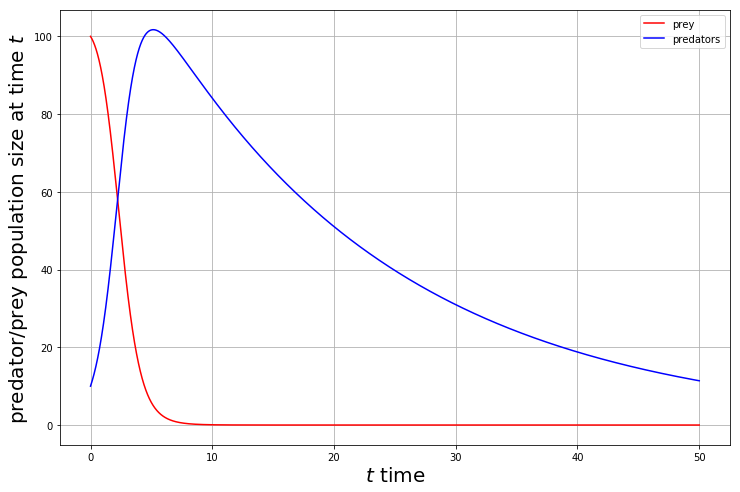

In [2]:
# we simulate T=50 discrete time steps from t=0 to 50, but we divide each time step into I=100 subintervals
T = 50
I = 100
STEPS = int(T * I)

x = np.zeros(STEPS) # prey population x at time subinterval t x[t]
y = np.zeros(STEPS) # predator population y at time subinterval t y[t]

# initial conditions
x[0] = 100 # prey population initially has 100 individuals
y[0] = 10 # predator population initially has 10 individuals

alpha = .05 # growth rate of the prey species
beta = .01 # rate of prey deaths from predator-prey interactions
gamma = .05 # predator decay rate deaths from starvation when insufficient prey
delta = .01 # growth rate of the predator population from predator-prey interactions

for t in range(1, STEPS):
    x[t] = x[t-1] + (1/I) * (x[t-1] * (alpha - beta * y[t-1]))
    y[t] = y[t-1] + (1/I) * (-y[t-1] * (gamma - delta * x[t-1]))
    

plt.figure(figsize=(12,8))
t = np.linspace(0, T, STEPS)
plt.plot(t, x, 'r-', label='prey')
plt.plot(t, y, 'b-', label='predators')
plt.xlabel('$t$ time', fontsize=20)
plt.ylabel('predator/prey population size at time $t$', fontsize=20)
plt.legend()
plt.grid();

It is easy to find parameters that lead to this stable state solution.  Here the predators eat all the prey to extinction, 
and then the surviving predator population eventually starves, since no prey were left to consume.  Perhaps the rate of deaths for the prey, and the rate of growth for predators when they eat prey is a bit too high.

Lets look at a more interesting stable state, one where the populations aren't driven to extinction but instead
the population sizes begin to oscillate.

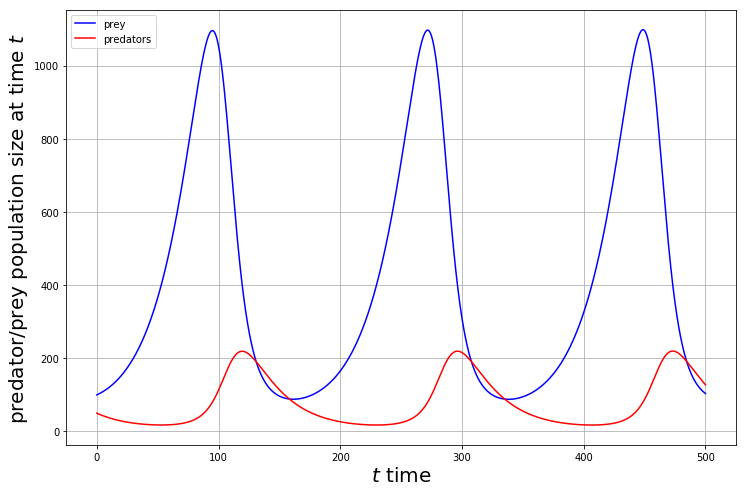

In [3]:
# we simulate T=500 discrete time steps, but we divide each time step into I=100 subintervals as before
T = 500
I = 100
STEPS = int(T * I)

x = np.zeros(STEPS) # prey population x at time subinterval t x[t]
y = np.zeros(STEPS) # predator population y at time subinterval t y[t]

# initial conditions
x[0] = 100 # prey population initially has 100 individuals
y[0] = 50 # predator population initially has 50 individuals

alpha = .04 # growth rate of the prey species
beta = .0005 # rate of prey deaths from predator-prey interactions
gamma = .04 # predator decay rate deaths from starvation when insufficient prey
delta = .0001 # growth rate of the predator population from predator-prey interactions

for t in range(1, STEPS):
    x[t] = x[t-1] + (1/I) * (x[t-1] * (alpha - beta * y[t-1]))
    y[t] = y[t-1] + (1/I) * (-y[t-1] * (gamma - delta * x[t-1]))
    

plt.figure(figsize=(12,8))
t = np.linspace(0, T, STEPS)
plt.plot(t, x, 'b-', label='prey')
plt.plot(t, y, 'r-', label='predators')
plt.xlabel('$t$ time', fontsize=20)
plt.ylabel('predator/prey population size at time $t$', fontsize=20)
plt.legend()
plt.grid();

Notice the oscillations that occur between a maximum and a minimum population size.  Notice also that the growth/decay of the
predator population follows that of the prey species, with a time lag.

Here is a technique that is used when analyzing the dynamical behavior of such systems.  We can get an idea of the
oscillatory nature of the two populations by createing what is known as a recurrence plot.  In this case we will plot
the value of the populations against one another at each time step.  So for example, at time $t=100$ the predator
population is somewhere around 60 in size, and the prey species has just passed the peak and is at about a size
of 1000.  We could plot this as a single point on a recurrence plot, at the point $x=60, y=1000$.  If we did that for
all of the time points of this simulation, we would get this:

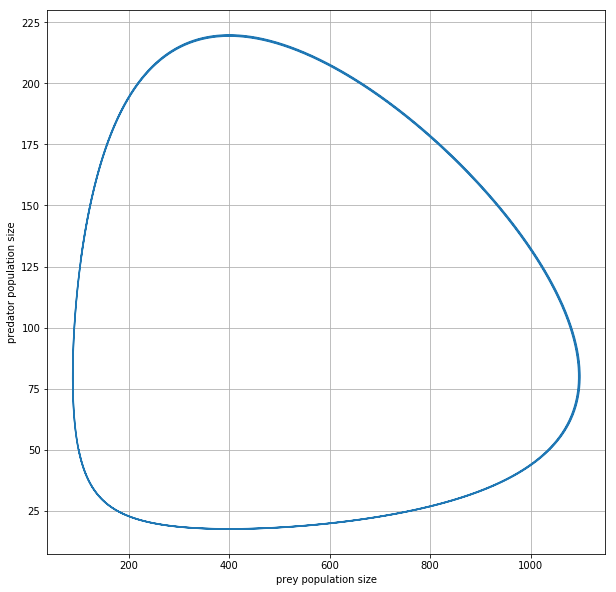

In [4]:
# create a recurrence plot
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.xlabel('prey population size')
plt.ylabel('predator population size')
plt.grid();

Notice that this plot makes a circle/oval in the phase space of our dynamical system.  This indicates that the
coupled population sizes cycle back on themselves, coming back to a previously inhabited point.  And from there
the dynamic repeats.

Here is another example of parameters giving oscillatory behavior.


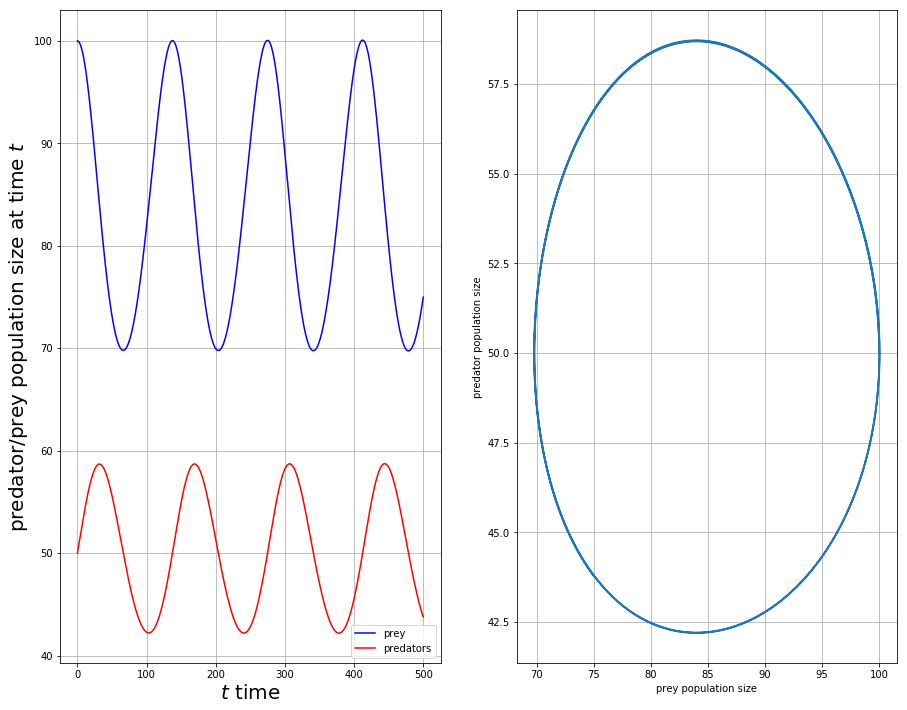

In [5]:
# we simulate T=500 discrete time steps, but we divide each time step into I=100 subintervals
T = 500
I = 100.0
STEPS = int(T * I)

x = np.zeros(STEPS) # prey population x at time subinterval t x[t]
y = np.zeros(STEPS) # predator population y at time subinterval t y[t]

# initial conditions
x[0] = 100 # prey population initially has 100 individuals
y[0] = 50 # predator population initially has 50 individuals

alpha = .05 # growth rate of the prey species
beta = .001 # rate of prey deaths from predator-prey interactions
gamma = .042 # predator decay rate deaths from starvation when insufficient prey
delta = .0005 # growth rate of the predator population from predator-prey interactions

for t in range(1, STEPS):
    x[t] = x[t-1] + (1/I) * (x[t-1] * (alpha - beta * y[t-1]))
    y[t] = y[t-1] + (1/I) * (-y[t-1] * (gamma - delta * x[t-1]))


plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
t = np.linspace(0, T, STEPS)
plt.plot(t, x, 'b-', label='prey')
plt.plot(t, y, 'r-', label='predators')
plt.xlabel('$t$ time', fontsize=20)
plt.ylabel('predator/prey population size at time $t$', fontsize=20)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,y)
plt.xlabel('prey population size')
plt.ylabel('predator population size')
plt.grid()

# save these for comparison in next simulation
x_oscillation = x
y_oscillation = y


Changing the $\alpha$, $\beta$, $\gamma$ and $\delta$ parameters will have an effect on the shape and the location
of the dynamics that the system will produce.  For example, we can find areas in our parameter space where
the recurrence plot reduces down to (close to) a point, not at the origin $(0,0)$, but somewhere in the positive
1st quadrant, representing a fairly stable population balance.  Here is an example:

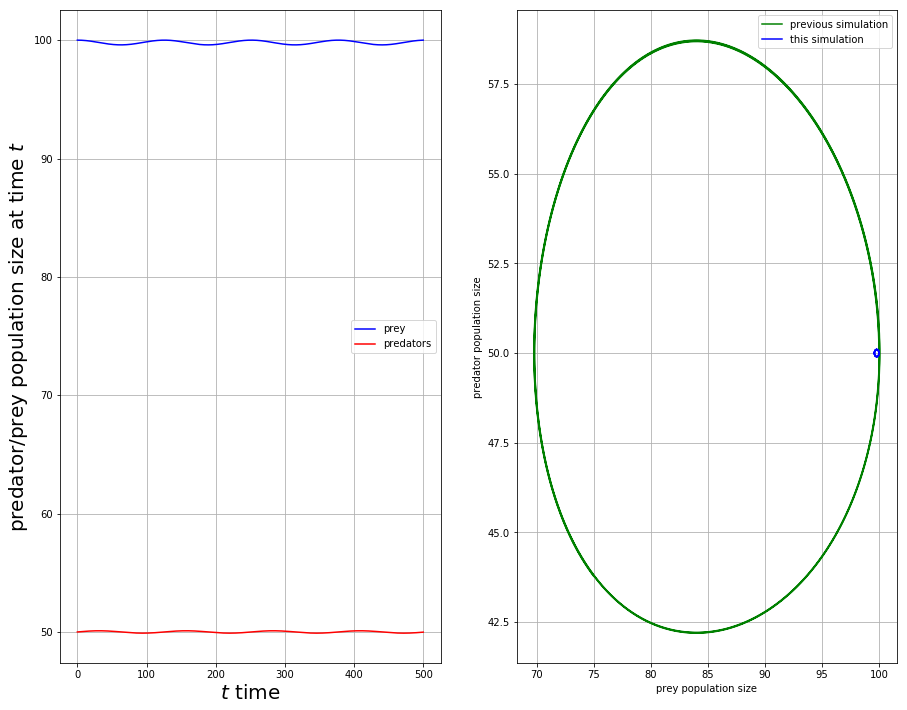

In [6]:
# we simulate T=500 discrete time steps, but we divide each time step into I=100 subintervals
T = 500
I = 100
STEPS = int(T * I)

x = np.zeros(STEPS) # prey population x at time subinterval t x[t]
y = np.zeros(STEPS) # predator population y at time subinterval t y[t]

# initial conditions
x[0] = 100 # prey population initially has 100 individuals
y[0] = 50 # predator population initially has 50 individuals

alpha = .05 # growth rate of the prey species
beta = .001 # rate of prey deaths from predator-prey interactions
gamma = .0499 # predator decay rate deaths from starvation when insufficient prey
delta = .0005 # growth rate of the predator population from predator-prey interactions

for t in range(1, STEPS):
    x[t] = x[t-1] + (1/I) * (x[t-1] * (alpha - beta * y[t-1]))
    y[t] = y[t-1] + (1/I) * (-y[t-1] * (gamma - delta * x[t-1])) 


plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
t = np.linspace(0, T, STEPS)
plt.plot(t, x, 'b-', label='prey')
plt.plot(t, y, 'r-', label='predators')
plt.xlabel('$t$ time', fontsize=20)
plt.ylabel('predator/prey population size at time $t$', fontsize=20)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_oscillation, y_oscillation, 'g-', label='previous simulation')
plt.plot(x,y, 'b-', label='this simulation')
plt.legend()
plt.xlabel('prey population size')
plt.ylabel('predator population size')
plt.grid();

In the recurrence plot shown here, we are displaying both the previous simulations dynamics (green), as well as the current
simulations dynamics (blue).  You might not quite notice it, but in the recurrence plot on the right, the dynamics 
of the current simulation make a very small circle on the right hand side.  There is still a bit of variation/oscillation,
but the populations have been mostly reduced to a stable point by this solution.

Taylor Series as a Difference Equation
--------------------------------------

Lets look at another example of a coupled difference equation.  The exponential function $e^x$ can be computed by 
evaluating the Taylor series sum:

$e^x = \displaystyle\sum_{n=0}^{\infty} \frac{x^n}{n!}$

(The exponential function simply raises the $e$ constant to some power $x$.  $e$ is known as
[Euler's Number](http://en.wikipedia.org/wiki/E_%28mathematical_constant%29)
and is a constant with value $e \approx 2.71828182846$.)


In [7]:
print( np.e ) 

2.718281828459045


We haven't mentioned it till this point, but there is of course a strong relationship between difference equations, and sums
and products that are often used in scientific modeling.  Do you understand how a sum like the one used in this example is
related to a series as we have discussed? This is another reason that understanding difference equations is so important.  

The series that is generated from the previous expression looks like this:

$e^x = \frac{x^0}{0!} + \frac{x^1}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + ...$

$\quad = 1 + x + \frac{x^2}{2} + \frac{x^3}{3 \cdot 2} + \frac{x^4}{4 \cdot 3 \cdot 2} + ...$

The following system of two difference equations will actually reproduce the terms of the Taylor series:

$e_n = e_{n-1} + a_{n-1}$

$a_n = \frac{x}{n} a_{n-1}$

with initial conditions $e_0 = 0$ and $a_0 = 1$.  You can prove this to yourself by expanding the difference equations by
hand:

$e_1 = 0 + a_0 = 0 + 1 = 1$

$a_1 = x$

$e_2 = e_1 + a_1 = 1 + x$

$a_2 = \frac{x}{2}a_1 = \frac{x^2}{2}$

$e_3 = e_2 + a_2 = 1 + x + \frac{x^2}{2}$

$e_4 = e_3 + a_3 = 1 + x + \frac{x^2}{2} + \frac{x^3}{3 \cdot 2}$

etc.

As we saw previously, we can code the difference equations as a function in Python fairly simply.  Here we would like to
create a function for approximating $e^x$ for some value $x$, using up to the n-th term of the taylor series.  The more terms we use, the better our approximation will be to the true value of the function $e^x$.  Here is an example implementation: 

In [8]:
def taylor_approximation_exp(x, N=100):
    """Approximate the exp(x) function using the Taylor series polynomial expansion.
    We expect x, a scalar float value, to compute e^x of.  N is the number of terms
    that we will expand the sum/series up to in order to approximate the value of e^x.
    """
    # initial condition, n=0
    e = e_prev = 0.
    a = a_prev = 1.
    
    # range from n=1 up to n=N-1
    for n in range(1,N):
        e = e_prev + a_prev
        a = (float(x) / float(n)) * a_prev
        e_prev = e
        a_prev = a
        
    return e

Some examples, and comparison of results to the Python built in exp() function which computes the exponential function.
In the last loop, we demonstrate how many terms of
the Taylor series we need to expand before the approximation is close enough to not be detectable within the precision of
the float type we are using to make our calculations.

In [9]:
print( "e^8, first   4 terms: %f %f" % (taylor_approximation_exp(8, N=4), np.exp(8)) ) 
print( "e^8, first  10 terms: %f %f" % (taylor_approximation_exp(8, N=10), np.exp(8)) ) 
print( "e^8, first 100 terms: %f %f" % (taylor_approximation_exp(8, N=100), np.exp(8)) ) 

for n in range(2,40):
    e_actual = np.exp(5)
    e_appx = taylor_approximation_exp(5, N=n)
    print( "%d: diff=%e" % (n, e_actual - e_appx) ) 

e^8, first   4 terms: 41.000000 2980.957987
e^8, first  10 terms: 1766.358730 2980.957987
e^8, first 100 terms: 2980.957987 2980.957987
2: diff=1.474132e+02
3: diff=1.424132e+02
4: diff=1.299132e+02
5: diff=1.090798e+02
6: diff=8.303816e+01
7: diff=5.699649e+01
8: diff=3.529510e+01
9: diff=1.979411e+01
10: diff=1.010599e+01
11: diff=4.723703e+00
12: diff=2.032558e+00
13: diff=8.093106e-01
14: diff=2.996241e-01
15: diff=1.035909e-01
16: diff=3.357902e-02
17: diff=1.024173e-02
18: diff=2.948828e-03
19: diff=8.038559e-04
20: diff=2.080304e-04
21: diff=5.123424e-05
22: diff=1.203519e-05
23: diff=2.702089e-06
24: diff=5.809288e-07
25: diff=1.198070e-07
26: diff=2.373994e-08
27: diff=4.526527e-09
28: diff=8.316476e-10
29: diff=1.474234e-10
30: diff=2.523848e-11
31: diff=4.177991e-12
32: diff=6.536993e-13
33: diff=8.526513e-14
34: diff=0.000000e+00
35: diff=0.000000e+00
36: diff=0.000000e+00
37: diff=0.000000e+00
38: diff=0.000000e+00
39: diff=0.000000e+00


# Versions

In [10]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.2.0
OS Linux 4.18.0 17 generic x86_64 with debian buster sid
numpy 1.16.4
scipy 1.3.1
matplotlib 3.0.2
Mon Sep 16 11:14:00 2019 CDT

# Acknowledgements

Materials and discussion for this notebook were based on Chapter 5 and Appendix A.4 of Langtangen (2009). "A Primer on Scientific Programming with Python", Springer-Verlag.